In [1]:
%matplotlib inline
from importlib import reload
import sys
sys.path.append('..') # If the Example has not been moved this should work

from LyaPlotter.computations import Computations
from LyaPlotter.plotter import Plotter
from LyaPlotter.sims import CoLoReSim, LyaCoLoReSim, QuickQuasarsSim
import glob
import logging
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

from matplotlib.gridspec import GridSpec

Given the large quantity of objects all the cells were not run at the same time. 

## CoLoRe Plotter

In [2]:
x1 = CoLoReSim(0, '/project/projectdirs/desi/users/jfarr/2LPT_mocks_hack/CoLoRe_4096_2LPT')
x2 = CoLoReSim(1, '/project/projectdirs/desi/users/jfarr/2LPT_mocks_hack/CoLoRe_4096_Gaussian')

A downsampling of 50% is applied.

In [3]:
c_file_1 = x1.get_Sources(ifiles=list(range(64)), lr_max=1200.,downsampling=0.5)
c_file_2 = x2.get_Sources(ifiles=list(range(64)), lr_max=1200.,downsampling=0.5)

### QSO distribution

Extracting $dn/dz$ input values from file:

In [4]:
th_z, th_n = np.loadtxt('../Data/CoLoRe/Nz_qso_130618_2_colore1_hZs.txt', unpack=True)
full_sky_deg = 4/np.pi*180**2

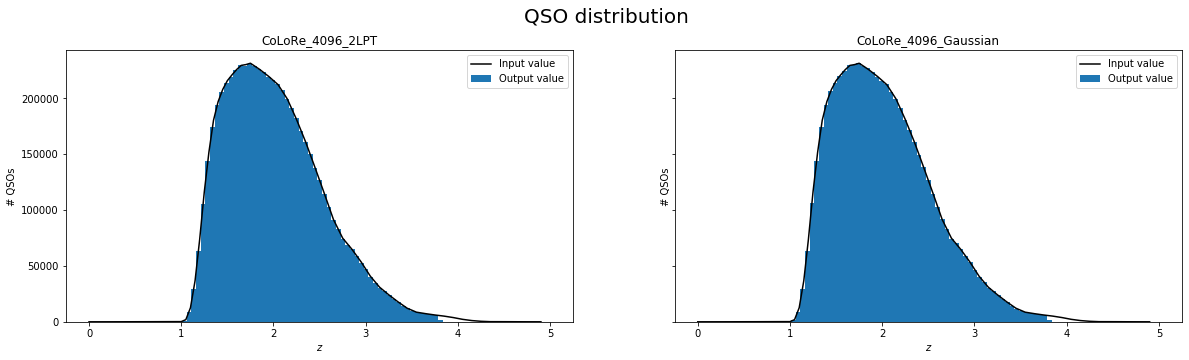

In [9]:
fig1, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array

bins = np.linspace(0,5,100)
width= bins[3]-bins[2]
_1 = c_file_1.plot_dist(ax=ax1, bins=bins, density=False, label='Output value')
_2 = c_file_2.plot_dist(ax=ax2, bins=bins, density=False, label='Output value')
for ax in ax1,ax2:
    ax.plot(th_z,th_n*full_sky_deg*width*0.5, color='k', label='Input value')
    ax.set_ylabel('# QSOs')
    ax.legend()
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
plt.suptitle('QSO distribution', fontsize=20, y=1)
plt.savefig('fig.png')
plt.show()

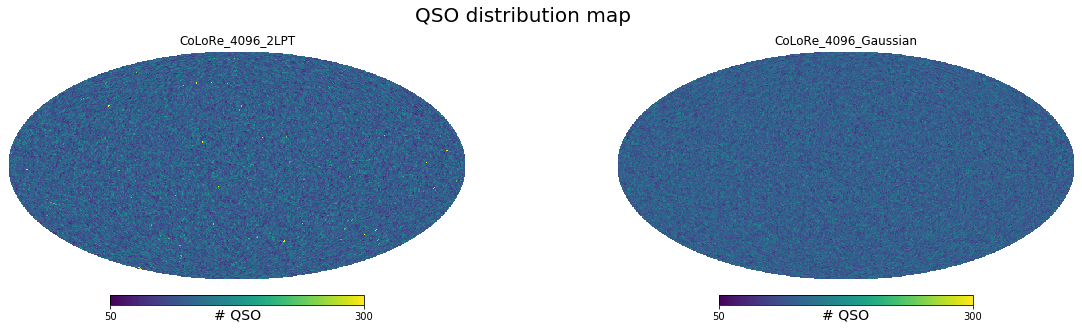

In [29]:
fig, ax_array = plt.subplots(1,2, figsize=(20,5))
ax1, ax2 = ax_array

min_count = 50
max_count = 300
bins = np.linspace(min_count, max_count, 70)

for file, ax in zip([c_file_1, c_file_2], [ax1,ax2]):
    nside = 64
    npix = hp.nside2npix(nside)
    pix = hp.ang2pix(nside,
                    np.radians(90-file.DEC),
                    np.radians(file.RA))
    n = np.bincount(pix, minlength=npix)
    n[n>max_count] = max_count
     
    plt.axes(ax)
    hp.mollview(n, title=file.sim.__name__, min=50, max=max_count, hold=True, unit='# QSO')
plt.suptitle('QSO distribution map', fontsize=20, y=1)
plt.savefig('fig.png')
plt.show()

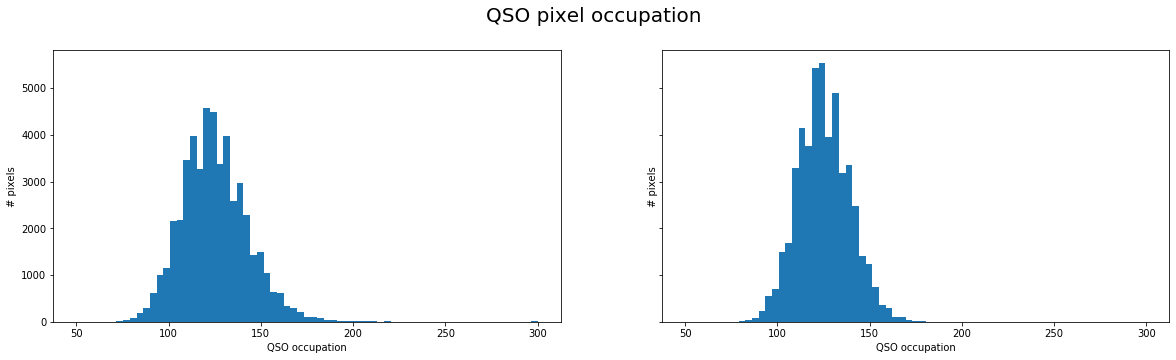

In [31]:
fig, ax_array = plt.subplots(1,2, sharex=True, sharey=True,figsize=(20,5))
ax1, ax2 = ax_array

min_count = 50
max_count = 300
bins = np.linspace(min_count, max_count, 70)

for file, ax in zip([c_file_1, c_file_2], [ax1,ax2]):
    nside = 64
    npix = hp.nside2npix(nside)
    pix = hp.ang2pix(nside,
                    np.radians(90-file.DEC),
                    np.radians(file.RA))
    n = np.bincount(pix, minlength=npix)
    n[n>max_count] = max_count
    
    plt.axes(ax)
    ax.hist(n, density=False, bins=bins, histtype='bar')
    ax.set_ylabel('# pixels')
    ax.set_xlabel('QSO occupation')
plt.suptitle('QSO pixel occupation', fontsize=20, y=1)
plt.savefig('fig.png')
plt.show()

# Plot pdf

For this step downsampling is extended.

In [5]:
c_file_1_pdf = x1.get_Sources(ifiles=list(range(1)), lr_max=1200.,downsampling=0.1)
c_file_2_pdf = x2.get_Sources(ifiles=list(range(1)), lr_max=1200.,downsampling=0.1)

In [6]:
x1.sim_path

'/project/projectdirs/desi/users/jfarr/2LPT_mocks_hack/CoLoRe_4096_2LPT'

In [ ]:
fig3, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1_pdf.plot_pdf(c_file_1_pdf.delta_skewers, ax=ax1, histtype='step')
_2 = c_file_2_pdf.plot_pdf(c_file_2_pdf.delta_skewers, ax=ax2, histtype='step')
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
plt.suptitle('Skewers PDF', fontsize=20, y=1)
plt.savefig('fig.png')
plt.show()

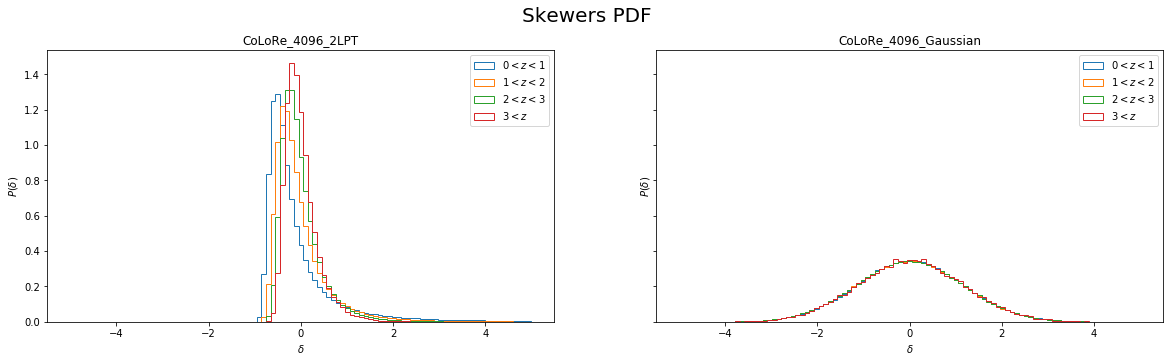

In [7]:
fig3, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1_pdf.plot_pdf(c_file_1_pdf.delta_skewers, ax=ax1, histtype='step')
_2 = c_file_2_pdf.plot_pdf(c_file_2_pdf.delta_skewers, ax=ax2, histtype='step')
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
plt.suptitle('Skewers PDF', fontsize=20, y=1)
plt.savefig('skewers_pdf.png')
plt.show()

### Plotting deltas

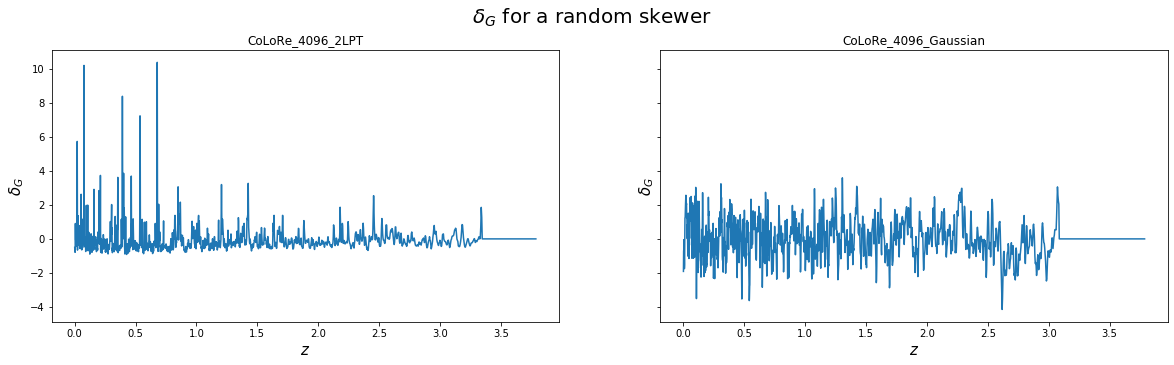

In [9]:
fig4, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.single_skewer(c_file_1.delta_skewers, ax=ax1, mockid=0)
_2 = c_file_2.single_skewer(c_file_2.delta_skewers, ax=ax2, mockid=0)
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
[ax.set_xlabel('$z$', fontsize=15) for ax in ax_array]
[ax.set_ylabel('$\delta_G$', fontsize=15) for ax in ax_array]
plt.suptitle('$\delta_G$ for a random skewer', fontsize=20, y=1)
plt.show()

Mean over all pixels = -0.0025643373373895884
Mean over all pixels = -0.003859491553157568


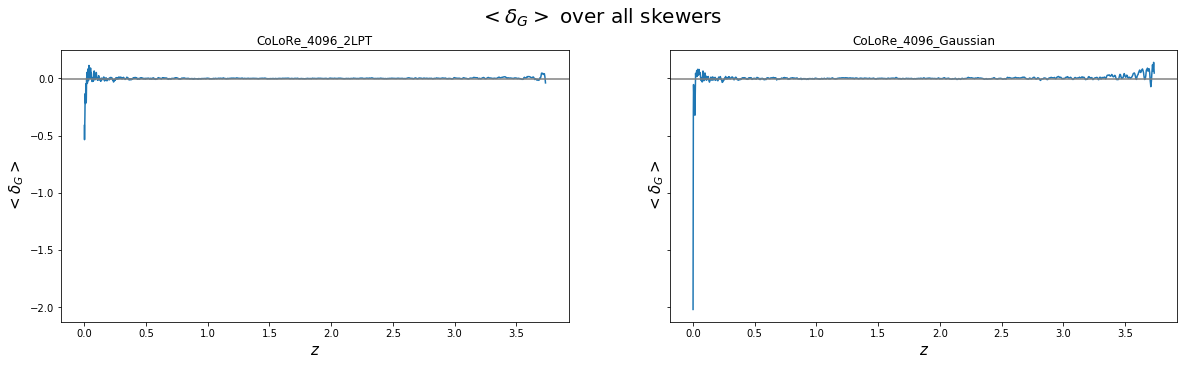

In [10]:
fig5, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.mean_all_skewers(c_file_1.delta_skewers, ax=ax1)
_2 = c_file_2.mean_all_skewers(c_file_2.delta_skewers, ax=ax2)
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)

for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$< \delta_G >$', fontsize=15)
plt.suptitle('$< \delta_G >$ over all skewers', fontsize=20, y=1)
plt.show()

Std over all pixels = 1.0253
Std over all pixels = 1.1649


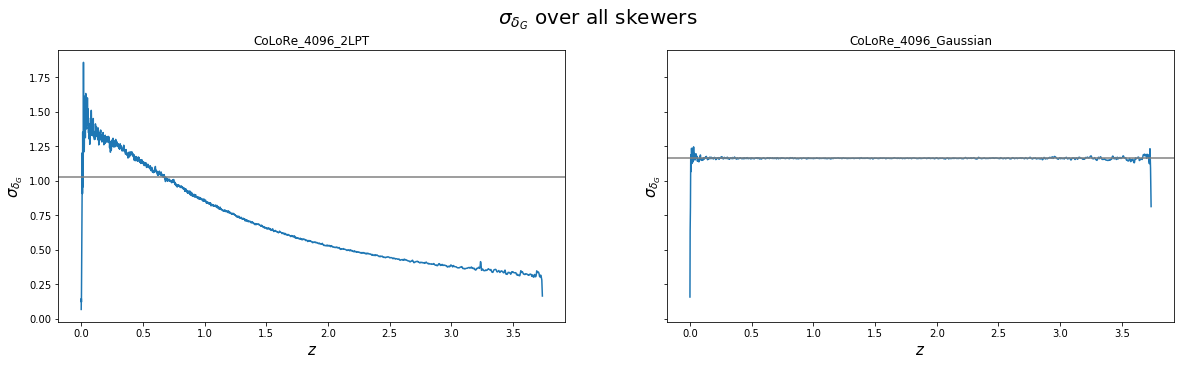

In [11]:
fig6, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.std_all_skewers(c_file_1.delta_skewers, ax=ax1)
_2 = c_file_2.std_all_skewers(c_file_2.delta_skewers, ax=ax2)

ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$\sigma_{\delta_G}$', fontsize=15)
plt.suptitle('$\sigma_{\delta_G}$ over all skewers', fontsize=20, y=1)
plt.show()

### Plotting radial velocity

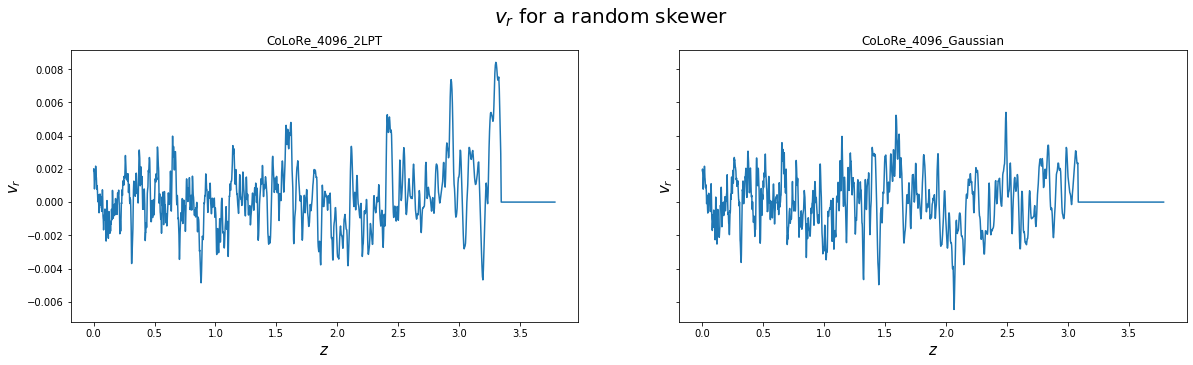

In [5]:
fig7, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.single_skewer(c_file_1.vrad, ax=ax1, mockid=0)
_2 = c_file_2.single_skewer(c_file_2.vrad, ax=ax2, mockid=0)

ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$ v_r$', fontsize=15)
plt.suptitle('$v_r$ for a random skewer', fontsize=20, y=1)
plt.show()

Mean over all pixels = 7.2190334321931e-05
Mean over all pixels = 7.004672079347074e-05


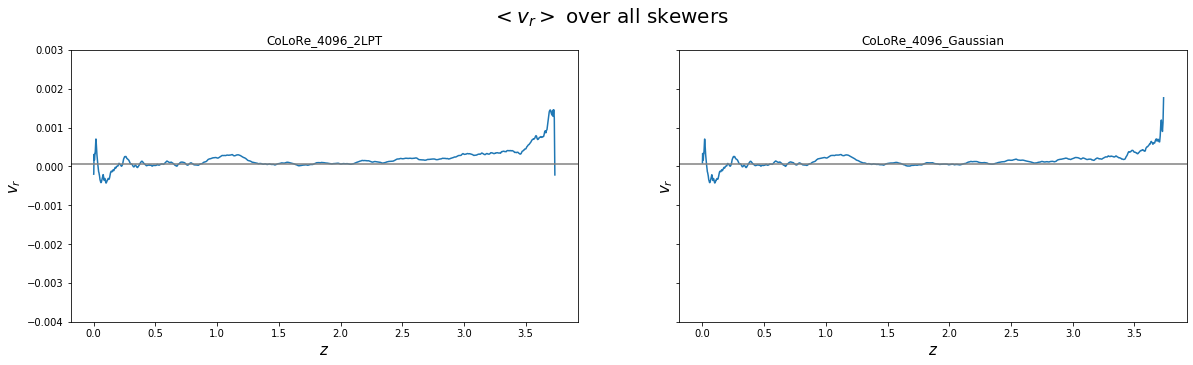

In [6]:
fig8, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.mean_all_skewers(c_file_1.vrad, ax=ax1)
_2 = c_file_2.mean_all_skewers(c_file_2.vrad, ax=ax2)
ax1.set_ylim(-0.004,0.003)

ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$ v_r$', fontsize=15)
plt.suptitle('$< v_r >$ over all skewers', fontsize=20, y=1)
plt.show()

Std over all pixels = 0.0061
Std over all pixels = 0.0058


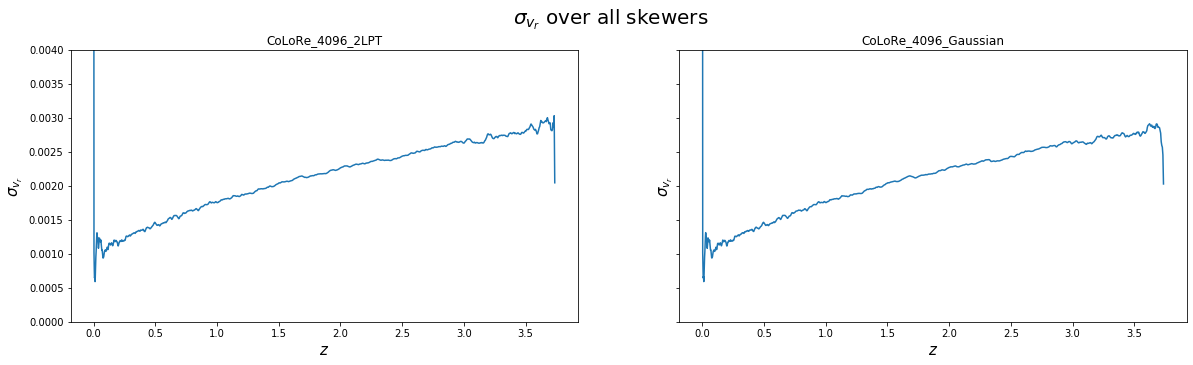

In [7]:
fig9, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.std_all_skewers(c_file_1.vrad, ax=ax1)
_2 = c_file_2.std_all_skewers(c_file_2.vrad, ax=ax2)
ax1.set_ylim(0,0.004)

ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$\sigma_{v_r}$', fontsize=15)
plt.suptitle('$\sigma_{v_r}$ over all skewers', fontsize=20, y=1)
plt.show()